In [159]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score,precision_score,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from ucimlrepo import fetch_ucirepo 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Funcniones**

In [198]:
def plot_feature_importances(Data,features,model):
    n_features = Data[features].shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), Data[features])
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
# Esta funcion crea un grafico de barras en la cual muestra las caracteristicas 
# que tan importantes son dichas caractersiticas para un arbol de decision o 
# un Random Forest

## ***Etapa 1: Entender los Datos***

In [161]:
data = fetch_ucirepo(id=17) 
type(data)
# Se crea la variable data, la cual es un diccionario usando el codigo 
# mostrado en la documentacion de ucimlrepo

ucimlrepo.dotdict.dotdict

In [199]:
data.keys()
# Se ven cuales son las llaves del deccionario para usarlas posteriormente

dict_keys(['data', 'metadata', 'variables'])

In [163]:
columnas = list(data['data'].keys())
columnas
# Se tiene que de la llave data estan los datos, de este nuevo diccionario se
# extraen las nuevas llaves para saber cual de ellas contiene los datos

['ids', 'features', 'targets', 'original', 'headers']

In [200]:
data['data']['ids'].head(2)
# Se hace la exploracion con data-ids en el cual solo se observa que esta el ID de los pacientes analizados

,ID
0,842302
1,842517


In [201]:
data['data']['features'].head(2)
# Se hace una segunda exploracion data-features donde estan los datos de interes pero no tiene info sobre
# la variable Targer

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [202]:
data['data']['targets'].head(2)
# En una tercera exploracion se hace con data-targets donde muestra los valores usados para 
# el diagnostico M(Maligno) y B (Benigno)

,Diagnosis
0,M
1,M


In [203]:
data['data']['original'].head(2)
# En la cuarta exploracion se obtiene todos los datos, incluidos los Targets
# por lo que se opta por usar la combinacion data-original como DataSet

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M


In [168]:
Data = pd.DataFrame(data['data']['original'])
Data.shape
# Se transforma el diccionario en un DataFrame

(569, 32)

In [169]:
Data.dropna(inplace=True)
Data.shape
# Se Eliminan los datos nulos, en este caso el data set es un data set completo

(569, 32)

## ***Etapa 2: Preprocesar Datos***

In [170]:
Data['Benigno'] = [1 if Data['Diagnosis'][i]== 'B' else 0 for i in range(len(Data['Diagnosis']))]
# La variable Target dentro del Data Set era un String, por lo que se hace un condicional para que se genere una nueva columna la cual es 1 si el Diagnostico = Benigno 
# y 0 si el Diagnostico = Maligno

In [171]:
Data.dtypes
# Se verifica que todos las variables correspondan al Dato correspondiente

ID                      int64
radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
Diagnosis              object
Benigno                 int64
dtype: obj

## ***Etapa 3: Modelado de los Datos***

In [172]:
features = ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
            'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
            'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
            'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
            'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
            'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
            'symmetry3', 'fractal_dimension3']
target = ['Benigno']
# Se crean listas que contienen las Features, es decir los X y el Target 

In [173]:
X = Data[features]
Y = Data[target]
# Se asignan las variables X, Y las cuales contiene la informacion en forma de DataFrame X es una tabla con todas las features y
# Y es un columna con los Targets

### ***Regresion Logistica***

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42)
logreg = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
# Se hace la partidion de los Datos y su entrenamiento usando regresion Losgistica
# tambien se imprimen los valores de Test y Train

Training set score: 0.958
Test set score: 0.951


In [175]:
y_pred = logreg.predict(X_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test,y_pred)))
print("Recall: {:.5f}".format(recall_score(y_test,y_pred,average='weighted')))
print("Precision: {:.5f}".format(precision_score(y_test,y_pred,average='weighted')))
# Se hace el analisis de Accuracy, Recall, y Precision para la regresion Logistica

Accuracy: 0.95105
Recall: 0.95105
Precision: 0.95253


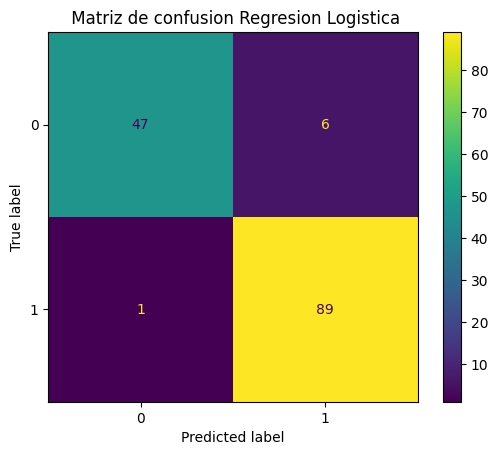

In [176]:
matriz_log = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(matriz_log)
disp.plot()
plt.title(f' Matriz de confusion Regresion Logistica')
plt.show()
# Se hace la respectiva matriz de confusion para Regresion logistica usando el metodo 
# confusion_matrix

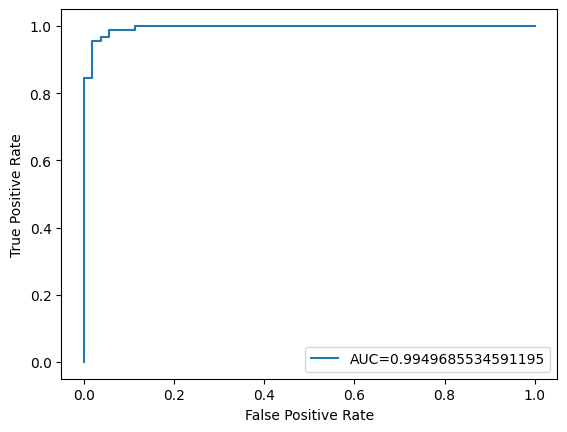

In [177]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
auc_log = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc_log))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
# Se hace la Grafica de ROC, la cual muesta que tan sensible es la 
# regresion logistica a la cantidad de variables usadas

### ***KNN Clasificador***

In [204]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))
# Se hace la partidion de los Datos y su entrenamiento usando KNN Classifier
# tambien se imprimen los valores de Test y Train

Training set score: 0.967
Test set score: 0.930


In [205]:
print("Accuracy: {:.5f}".format(accuracy_score(y_test,y_pred)))
print("Recall: {:.5f}".format(recall_score(y_test,y_pred,average='weighted')))
print("Precision: {:.5f}".format(precision_score(y_test,y_pred,average='weighted')))
# Se hace el analisis de Accuracy, Recall, y Precision para el KNN Clasificador

Accuracy: 0.93007
Recall: 0.93007
Precision: 0.93096


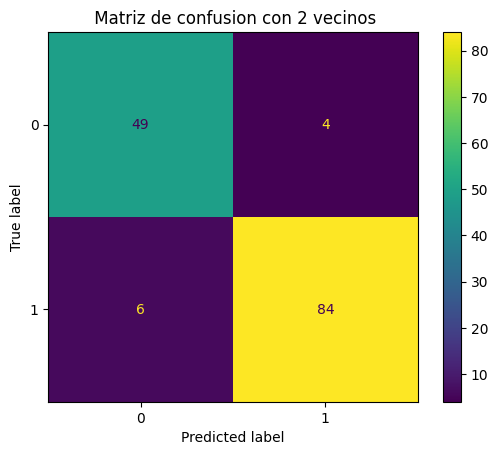

In [179]:
matriz_knn = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(matriz_knn)
disp.plot()
plt.title(f' Matriz de confusion con {2} vecinos')
plt.show()
# Se hace la respectiva matriz de confusion para KNN Clasificador usando el metodo 
# confusion_matrix

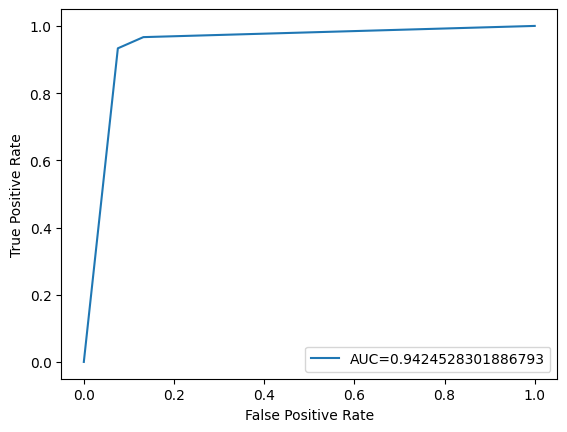

In [180]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
auc_KNN = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc_KNN))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
# Se hace la Grafica de ROC, la cual muesta que tan sensible es el  
# KNN Clasificador a la cantidad de variables usadas

### ***Arbol Decision***

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42)
tree = DecisionTreeClassifier(max_depth=2,random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
# En el primer analisis se hace un solo arbol de decision el cual da un 100% en el Training
# siendo este un Overfitting

Accuracy on training set: 0.958
Accuracy on test set: 0.909


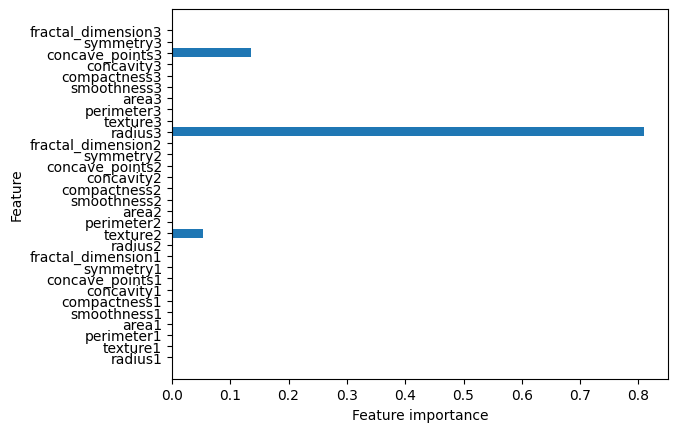

In [182]:
plot_feature_importances(Data,features,tree)
# Para comprender mejor como el arbol hace la clasificacion se observan cuales son las variables mas relevantes para el

In [209]:
y_pred = tree.predict(X_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test,y_pred)))
print("Recall: {:.5f}".format(recall_score(y_test,y_pred,average='weighted')))
print("Precision: {:.5f}".format(precision_score(y_test,y_pred,average='weighted')))
# Se hace la partidion de los Datos y su entrenamiento usando Arboles de Decision
# tambien se imprimen los valores de Test y Train

Accuracy: 0.90909
Recall: 0.90909
Precision: 0.91548


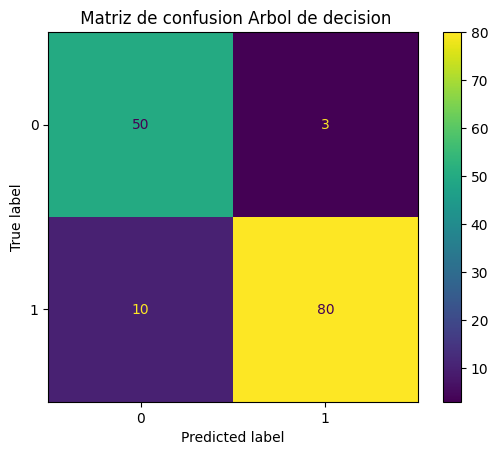

In [208]:
matriz_tree = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(matriz_tree)
disp.plot()
plt.title(f' Matriz de confusion Arbol de decision')
plt.show()
# Se hace la respectiva matriz de confusion para Arboles de Decision usando el metodo 
# confusion_matrix

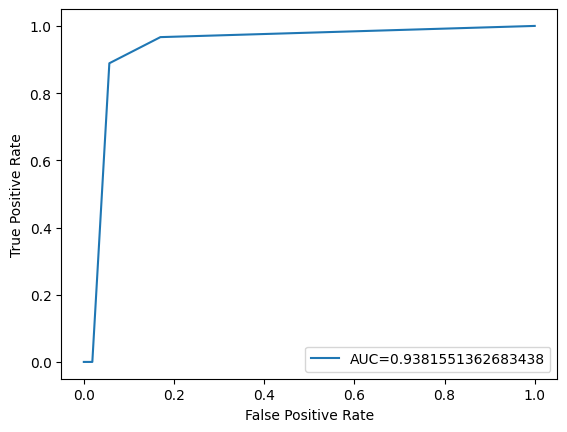

In [184]:
y_pred_proba = tree.predict_proba(X_test)[::,1]
auc_tree= roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc_tree))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
# Se hace la Grafica de ROC, la cual muesta que tan sensible es el  
# Arbol de Decision a la cantidad de variables usadas

### ***Random Forest***

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state=42)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


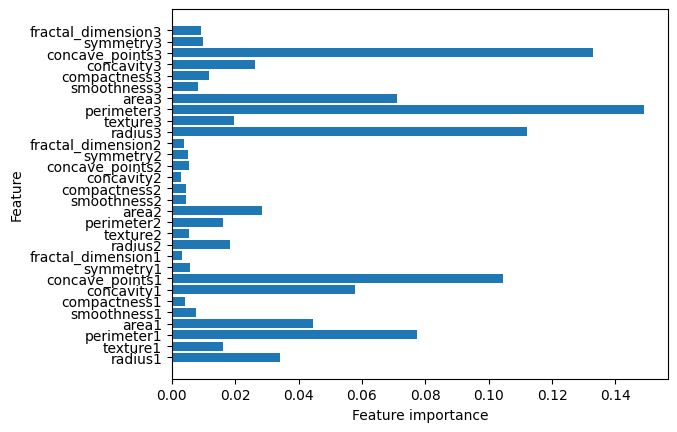

In [186]:
plot_feature_importances(Data,features,forest)

In [210]:
y_pred = forest.predict(X_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test,y_pred)))
print("Recall: {:.5f}".format(recall_score(y_test,y_pred,average='weighted')))
print("Precision: {:.5f}".format(precision_score(y_test,y_pred,average='weighted')))
# Se hace la partidion de los Datos y su entrenamiento usando Random Forest
# tambien se imprimen los valores de Test y Train

Accuracy: 0.95804
Recall: 0.95804
Precision: 0.95810


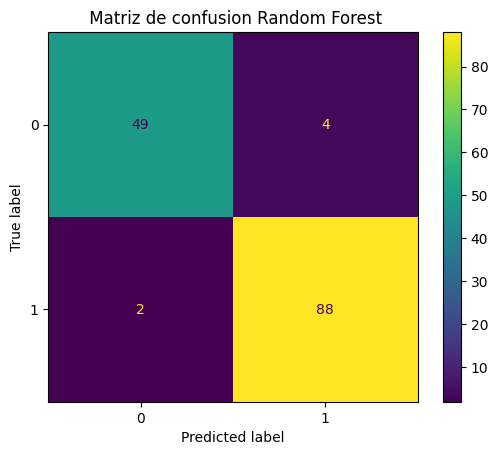

In [211]:
matriz_forest = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(matriz_forest)
disp.plot()
plt.title(f' Matriz de confusion Random Forest')
plt.show()
# Se hace la respectiva matriz de confusion para Random Forest usando el metodo 
# confusion_matrix

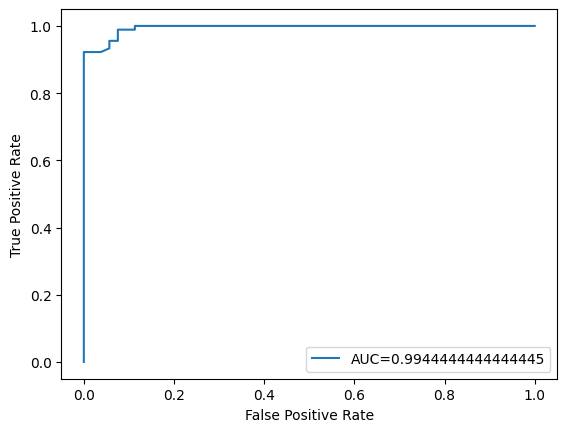

In [188]:
y_pred_proba = forest.predict_proba(X_test)[::,1]
auc_forest= roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc_forest))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
# Se hace la Grafica de ROC, la cual muesta que tan sensible es el  
# Random Forest a la cantidad de variables usadas

### ***Resumir Metricas***

In [189]:
y_pred = forest.predict(X_test)
acc_forest = accuracy_score(y_test,y_pred)
rcall_forest = recall_score(y_test,y_pred,average='weighted')
pres_forest = precision_score(y_test,y_pred,average='weighted')
metrics_forest = np.array([acc_forest,rcall_forest,pres_forest])
# Se crean variables de las metricas del Random Forest para luego resumirlas

In [190]:
y_pred_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test,y_pred_tree)
rcall_tree = recall_score(y_test,y_pred_tree,average='weighted')
pres_tree = precision_score(y_test,y_pred_tree,average='weighted')
metrics_tree = np.array([acc_tree,rcall_tree,pres_tree])
# Se crean variables de las metricas del Arbol de Decision para luego resumirlas

In [191]:
y_pred_knn = clf.predict(X_test)
acc_knn = accuracy_score(y_test,y_pred_knn)
rcall_knn = recall_score(y_test,y_pred_knn,average='weighted')
pres_knn = precision_score(y_test,y_pred_knn,average='weighted')
metrics_knn = np.array([acc_knn,rcall_knn,pres_knn])
# Se crean variables de las metricas del KNN Clasificador para luego resumirlas

In [192]:
y_pred_log = logreg.predict(X_test)
acc_log = accuracy_score(y_test,y_pred_log)
rcall_log = recall_score(y_test,y_pred_log,average='weighted')
pres_log = precision_score(y_test,y_pred_log,average='weighted')
metrics_log = np.array([acc_log,rcall_log,pres_log])
# Se crean variables de las metricas de la Regression Logisitica para luego resumirlas

## ***Etapa 4: Reflexion y Conclusiones***

Al hacer la prediccion con los diferentes modelos, se observa que todos tienen un muy buen ajuste, en cuanto al semepeño de las diferentes metrica, en la siguiente tabla se observa que su Accuracy, recall y presecion estan por encima del 90%, sin embargo donde se tiene que ver el desempeño de este tipo de modelos, en especial para predecir cosas relacionadas a la medicina y la salud es la matriz de confusion

In [212]:
metricas = pd.DataFrame([metrics_forest,
                         metrics_tree,
                         metrics_knn,
                         metrics_log],columns=['Accuracy','Recall','Precision'],
                        index=['forest','tree','knn','reg-log'])
metricas
# Se crea un Data Frame con las variables de las metricas anteriormente creadas en "Resumir Matricas"

,Accuracy,Recall,Precision
forest,0.958042,0.958042,0.958102
tree,0.909091,0.909091,0.915480
knn,0.930070,0.930070,0.930960
reg-log,0.951049,0.951049,0.952529


Para tener una mejor idea de que tambien un modelo puede predecir y de las consecuencias de los errores de prediccion se tiene que analizar la matriz de confusion, de esta nos interesan los datos por fuera de la diagonal principal.

En el caso de el diagnostico de cancer hay una diferencia fundamental al cometer errores, el error tipo es predecir como ***Benigno*** (1) un tumor que es ***Maligno*** (0) que es el peor error, pues se juega con la salud del paciente ya que se le daria un diagnostico erroneo estando enfermo.
 
Por otro lado esta error tipo 2 que es predecir como ***Maligno*** (0) un tumor que es ***Benigno*** (1) que no es tan grave pues simplemente el paciente seria sometido a un tratamiento innecesario y pasaria por una mala experiencia.

En el caso de la regresion logistica se tiene que 6 de los 143 (4.19%) casos de prediccion los califica en error tipo 1, es decir el tumor es calificado como ***Benigno*** (1) siendo ***Maligno*** (0), Califica a 7 de manera errada (4.89%)

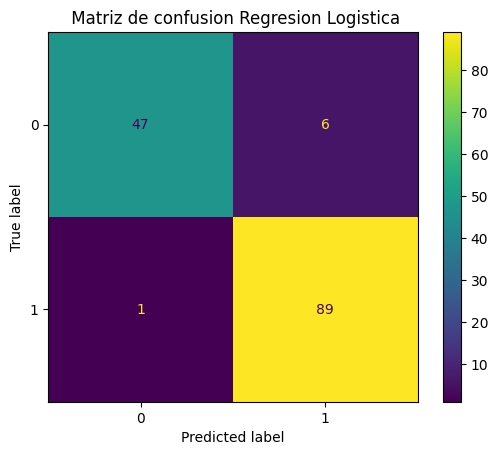

In [194]:
y_pred = logreg.predict(X_test)
matriz_log = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(matriz_log)
disp.plot()
plt.title(f' Matriz de confusion Regresion Logistica')
plt.show()

En el caso del Clasificador KNN de igual modo tiene 4 de los 143 (2.27%) casos de prediccion los califica en error tipo 1, es decir el tumor es calificado como ***Benigno*** (1) siendo ***Maligno*** (0), pero califica de manera errada 10 casos (6.99%)

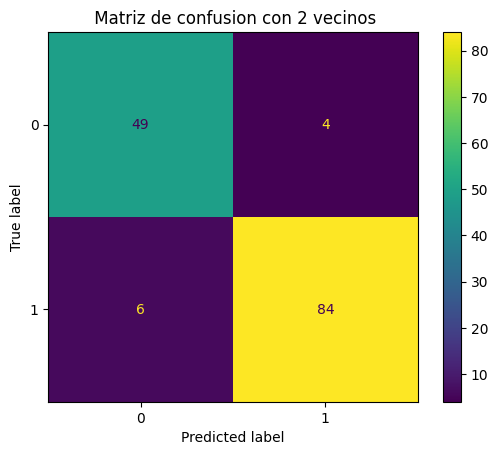

In [195]:
y_pred = clf.predict(X_test)
matriz_knn = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(matriz_knn)
disp.plot()
plt.title(f' Matriz de confusion con {2} vecinos')
plt.show()

En el caso los arboles de decision tiene 3 de los 143 (2.09%) casos de prediccion los califica en error tipo 1, es decir el tumor es calificado como ***Benigno*** (1) siendo ***Maligno*** (0), califica 13 de manera errada (9.09%)

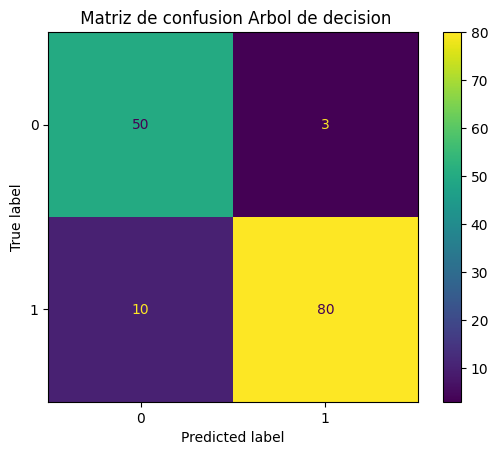

In [196]:
y_pred = tree.predict(X_test)
matriz_tree = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(matriz_tree)
disp.plot()
plt.title(f' Matriz de confusion Arbol de decision')
plt.show()

En el caso del Random Forest de igual modo tiene 4 de los 143 (2.27%) casos de prediccion los califica en error tipo 1, es decir el tumor es calificado como ***Benigno*** (1) siendo ***Maligno*** (0). Califica a 6 de manera errada (4.19%)

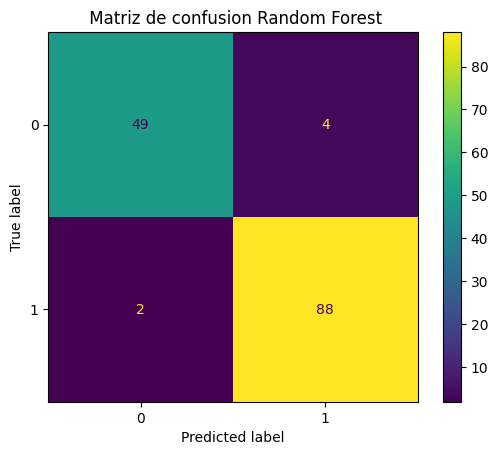

In [197]:
y_pred = forest.predict(X_test)
matriz_forest = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(matriz_forest)
disp.plot()
plt.title(f' Matriz de confusion Random Forest')
plt.show()

En conclusion si se quiere tener la menor tasa de error tipo 1 [calificar ***Benigno*** (1) siendo ***Maligno*** (0)] usar arboles de decision seria la mejor opcion a primera vista pues solo cometio 3 errores de este tipo, sin embargo si se desea tener la menor cantidad de error en la prediccion usar Random Forest seria lo ideal, pues solo comete 6 errores.

En estos casos donde el objetivo es tener el menor margen de error lo ideal es usar un Random Forest y como complemento a un analisis sobre cancer usar la Regresion Logistica, estos modelos tienen el menor margen de error por lo que al usar nueva Data tienen una menor probabilidad de cometer un error, independiente del tipo de error que predigan.

Cabe aclarar que el diagnostico de cancer no solo se debe basar en un modelo de clasificacion, pues como se observa pueden cometer errores, pues la misma naturaleza de la data solo son caracteristicas fisiologicas de un tumores, mas no hay tados sobre la quimica sanguinea de los pacientes analizados ni de examenes de anticuerpos y/o proteinas. Si se agregan nuevas caracterisiticas al data set como las mencionadas es mas factible tener modelos mas robustos en cuanto a predecir el cancer.